In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("/Users/furkanozdal/Downloads/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/gene_expression.csv")

In [4]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

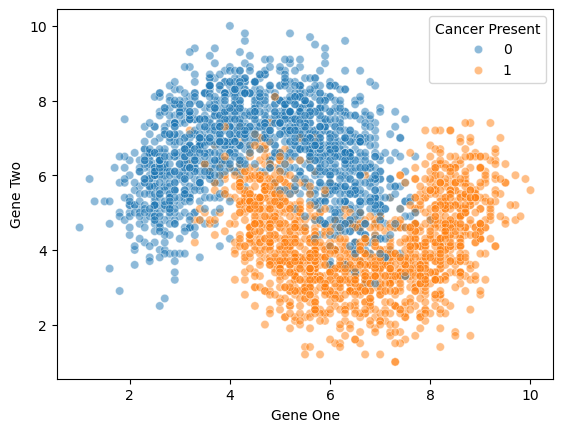

In [5]:
sns.scatterplot(data=df,x="Gene One",y="Gene Two",hue="Cancer Present",alpha=0.5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


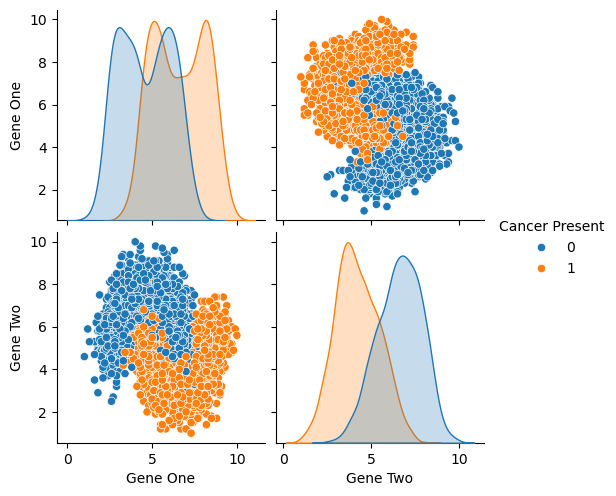

In [7]:
sns.pairplot(data=df,hue="Cancer Present")

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
X = df.drop("Cancer Present",axis=1)
y = df["Cancer Present"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
model = KNeighborsClassifier(n_neighbors=1)

In [20]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
confusion_matrix(y_test,y_pred)

array([[424,  46],
       [ 49, 381]])

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       470
           1       0.89      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



In [27]:
from sklearn.metrics import accuracy_score

In [33]:
test_errors = []

for i in range(1,30):
    k_model = KNeighborsClassifier(n_neighbors=i)
    k_model.fit(X_train,y_train)
    y_pred = k_model.predict(X_test)
    test_errors.append(1-accuracy_score(y_test,y_pred))

In [34]:
test_errors

[0.10555555555555551,
 0.09999999999999998,
 0.07444444444444442,
 0.07777777777777772,
 0.07222222222222219,
 0.06666666666666665,
 0.06333333333333335,
 0.05888888888888888,
 0.05777777777777782,
 0.06222222222222218,
 0.06000000000000005,
 0.061111111111111116,
 0.061111111111111116,
 0.061111111111111116,
 0.06000000000000005,
 0.05777777777777782,
 0.05555555555555558,
 0.05555555555555558,
 0.053333333333333344,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.05777777777777782,
 0.05777777777777782]

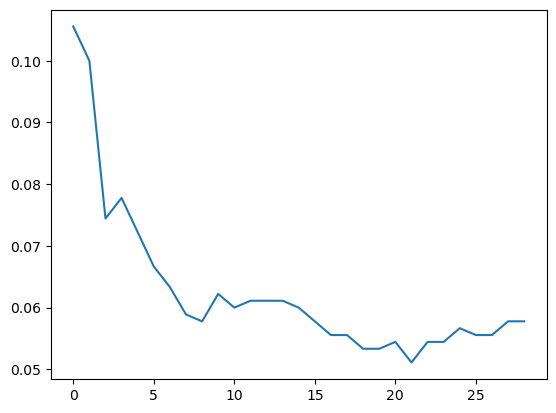

In [35]:
plt.plot(test_errors)

In [36]:
scaler = StandardScaler()

In [37]:
knn = KNeighborsClassifier()

In [39]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [40]:
operations = [("scaler",scaler),("knn",knn),]

In [42]:
from sklearn.pipeline import Pipeline

In [43]:
pipe = Pipeline(steps=operations)

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
k_values = list(range(1,20))

In [46]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [47]:
param_grid = {"knn__n_neighbors":k_values}

In [48]:
full_cv_classifer = GridSearchCV(pipe,param_grid,cv=5,scoring="accuracy")

In [49]:
full_cv_classifer.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [52]:
full_cv_classifer.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=14))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=14),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 14,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [54]:
y_pred = full_cv_classifer.predict(X_test)

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900

